# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/titanium.csv')
X = data.x.values.reshape(-1, 1)
Y = data.y.values
data.head(5)

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


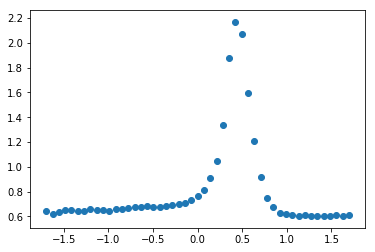

In [133]:
X = (X - X.mean()) / X.std()
plt.scatter(X, Y)

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

### Revision:
Best initial method to check model on *overfitting* is to measure error on a training and test set.
If you see low error on training set and high error on test & validation set then you have likely overfitted the model. 
Or, if both are low, test your model in the wild, on unseen data.

In [134]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.patches as mpatches

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
C = np.logspace(-5, 6, num=25)
y_lin = np.zeros((len(C),3))
y_pol = np.zeros((len(C),3))
y_rbf = np.zeros((len(C),3))

In [118]:
def model_scores(model, kernel_t, g='auto', c=0.0):
    tmp_i = 0
    y = np.zeros((len(C),3))
    for i in C:
        m = model(kernel=kernel_t, epsilon=0.01, C=i, gamma = g, coef0 = c)
        m.fit(x_train, y_train)
        y[tmp_i][0] = i
        y[tmp_i][1] = mae(m.predict(x_train), y_train)
        y[tmp_i][2] = mae(m.predict(x_test), y_test)
        tmp_i += 1
    return y

def plotting(y):
    fig = plt.figure(figsize=(8,8))
    plt.plot(y[:, 0], y[:, 1], '-b', label='train score')
    plt.plot(y[:, 0], y[:, 2], '-r', label='test score')
    plt.xlabel('C parameter')
    plt.ylabel('MAE Score')
    plt.legend()
    tmp = min(y, key=lambda a: a[2])
    plt.annotate(
        'Best score!',
        xy=(tmp[0], tmp[2]),arrowprops=dict(arrowstyle='->'), xytext=(0, tmp[2] + y[:, 2].std()))
def plotting_best(b_param, model, kernel_t, g='auto', c=0.0):
    m_best = model(kernel=kernel_t, epsilon=0.01, C=b_param, gamma = g, coef0 = c)
    m_best.fit(x_train, y_train)
    y_pred = m_best.predict(x_test)
    fig = plt.figure(figsize=(8,8))
    plt.scatter(x_test, y_test, c='b', label='test data')
    plt.scatter(x_test, y_pred, c='r', label='predicted data')
    plt.xlabel('X data')
    plt.ylabel('Y data')
    plt.legend()

In [101]:
y_lin = model_scores(svm.SVR, 'linear')

print(pd.DataFrame(data=y_lin, columns=['C', 'Train', 'Test']))

                 C     Train      Test
0         0.000010  0.175207  0.179967
1         0.000029  0.175208  0.179969
2         0.000083  0.175213  0.179973
3         0.000237  0.175227  0.179986
4         0.000681  0.175258  0.180015
5         0.001957  0.175257  0.180013
6         0.005623  0.175235  0.180233
7         0.016156  0.175013  0.181118
8         0.046416  0.174971  0.181333
9         0.133352  0.174971  0.181333
10        0.383119  0.174971  0.181333
11        1.100694  0.174971  0.181333
12        3.162278  0.174971  0.181333
13        9.085176  0.174971  0.181333
14       26.101572  0.174971  0.181333
15       74.989421  0.174971  0.181334
16      215.443469  0.174971  0.181334
17      618.965819  0.174971  0.181336
18     1778.279410  0.174971  0.181341
19     5108.969775  0.174973  0.181356
20    14677.992676  0.174977  0.181398
21    42169.650343  0.174988  0.181521
22   121152.765863  0.175071  0.181078
23   348070.058843  0.182285  0.188299
24  1000000.000000  0.207

/home/bobrg/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


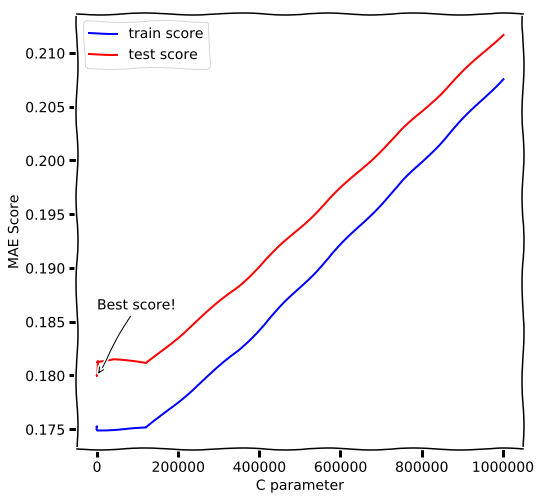

In [105]:
plotting(y_lin)

/home/bobrg/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


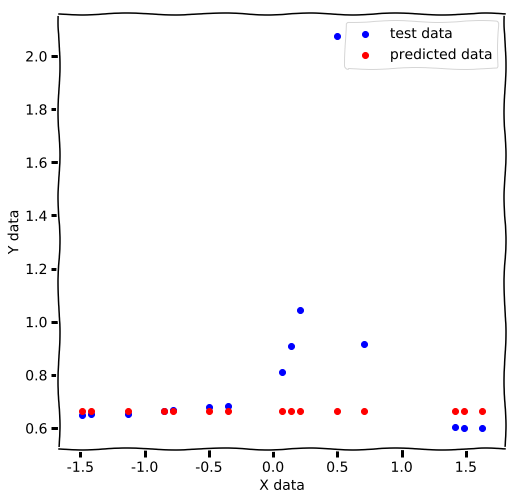

In [119]:
plotting_best(min(y_lin, key=lambda a: a[2])[0], svm.SVR, 'linear')

In [120]:
#degree = 3, gamma = 6, coef0 = 1
y_pol = model_scores(svm.SVR, 'poly', 6, 1)

print(pd.DataFrame(data=y_pol, columns=['C', 'Train', 'Test']))

                 C     Train       Test
0         0.000010  0.162788   0.165272
1         0.000029  0.159467   0.161509
2         0.000083  0.157394   0.159391
3         0.000237  0.156857   0.160097
4         0.000681  0.156733   0.158818
5         0.001957  0.155586   0.161319
6         0.005623  0.155348   0.160833
7         0.016156  0.155668   0.160662
8         0.046416  0.155703   0.160330
9         0.133352  0.155673   0.160580
10        0.383119  0.155674   0.160589
11        1.100694  0.155698   0.160326
12        3.162278  0.155714   0.160417
13        9.085176  0.155646   0.160891
14       26.101572  0.155790   0.160796
15       74.989421  0.155939   0.156542
16      215.443469  0.157994   0.149967
17      618.965819  0.161911   0.159094
18     1778.279410  0.196735   0.168259
19     5108.969775  0.193628   0.189835
20    14677.992676  0.181466   0.148139
21    42169.650343  1.826429   1.712839
22   121152.765863  1.792271   2.086496
23   348070.058843  3.492878   4.066321


/home/bobrg/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


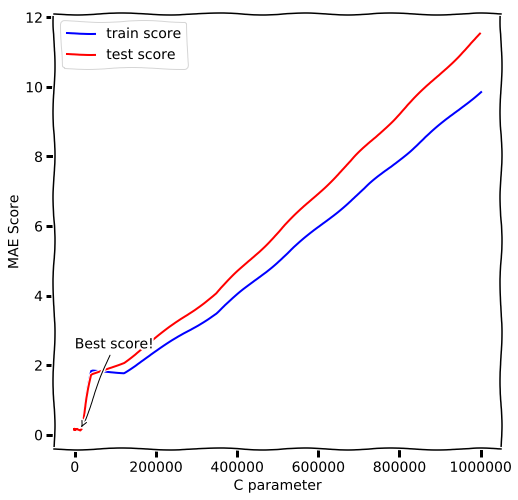

In [121]:
plotting(y_pol)

/home/bobrg/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


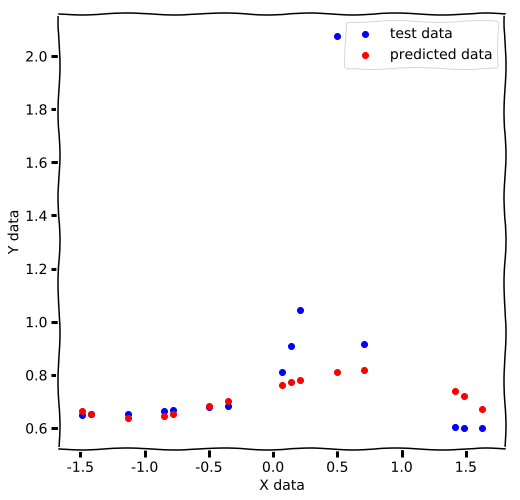

In [122]:
plotting_best(min(y_pol, key=lambda a: a[2])[0], svm.SVR, 'poly', 6, 1)

In [123]:
y_rbf = model_scores(svm.SVR, 'rbf', 6, 1)

print(pd.DataFrame(data=y_rbf, columns=['C', 'Train', 'Test']))

                 C     Train      Test
0         0.000010  0.175164  0.179923
1         0.000029  0.175086  0.179841
2         0.000083  0.174861  0.179604
3         0.000237  0.174204  0.178939
4         0.000681  0.172272  0.177078
5         0.001957  0.167764  0.172497
6         0.005623  0.157040  0.161561
7         0.016156  0.142435  0.143864
8         0.046416  0.121713  0.116319
9         0.133352  0.090687  0.080806
10        0.383119  0.053287  0.080333
11        1.100694  0.040782  0.073484
12        3.162278  0.028418  0.077854
13        9.085176  0.024619  0.064034
14       26.101572  0.022254  0.051021
15       74.989421  0.020025  0.035537
16      215.443469  0.018297  0.028402
17      618.965819  0.015761  0.033678
18     1778.279410  0.012588  0.054594
19     5108.969775  0.011664  0.048997
20    14677.992676  0.010049  0.045914
21    42169.650343  0.010012  0.049013
22   121152.765863  0.009790  0.051629
23   348070.058843  0.009790  0.051629
24  1000000.000000  0.009

/home/bobrg/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


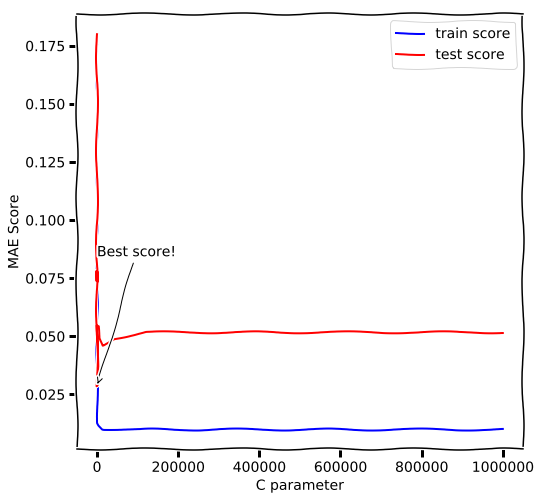

In [124]:
plotting(y_rbf)

/home/bobrg/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


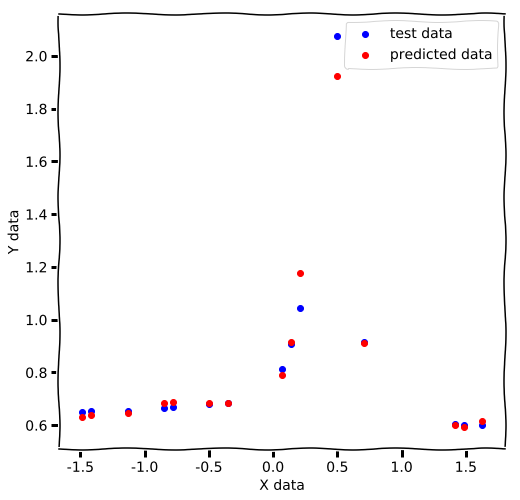

In [125]:
plotting_best(min(y_rbf, key=lambda a: a[2])[0], svm.SVR, 'rbf', 6, 1)

RBF очевидно переобучилась на шумы.
Linear ядро попыталось приблизить распределение линейной функцией, однако

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [135]:
wapen = pd.read_csv('data/war_and_peace_en.txt')
wapen.columns = ['word']
wapen = wapen.assign(label=np.ones(len(wapen['word'])))
wapes = pd.read_csv('data/war_and_peace_es.txt')
wapes.columns = ['word']
wapes = wapes.assign(label=np.zeros(len(wapes['word'])))
data = wapen.append(wapes, ignore_index=True)

In [136]:
data.head(5)

,word,label
0,and,1.0
1,peace,1.0
2,leo,1.0
3,tolstoy,1.0
4,book,1.0


In [137]:
data.tail(5)

,word,label
11396,cui,0.0
11397,gli,0.0
11398,ospiti,0.0
11399,sarebbero,0.0
11400,ritrovati,0.0


In [138]:
X = data['word']
y = data['label']

## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [139]:
RND_SEED = 42
# I will be reducing amount of iterations in svm.SVC and I want to hide all warnings
import warnings
from sklearn.model_selection import StratifiedShuffleSplit
warnings.simplefilter('ignore')

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer
countvec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
#SVM
SVML = svm.SVC(kernel='linear', max_iter=400, random_state=RND_SEED)
#creating a pipeline
countvecsvm = Pipeline([('countvec', countvec), ('svml', SVML)])

In [13]:
N_GRAMS_OPTIONS = [(1,1), (2,2), (2,3), (3,3)]
C_OPTIONS = np.logspace(-4, 4, num=10)
param_grid = {'countvec__ngram_range': N_GRAMS_OPTIONS, 'svml__C': C_OPTIONS}

In [14]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(countvecsvm, param_grid,
                    cv=StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=RND_SEED),
                   n_jobs=4)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=4, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('countvec', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        s...',
  max_iter=400, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'countvec__ngram_range': [(1, 1), (2, 2), (2, 3), (3, 3)], 'svml__C': array([  1.00000e-04,   7.74264e-04,   5.99484e-03,   4.64159e-02,
         3.59381e-01,   2.78256e+00,   2.15443e+01,   1.66810e+02,
         1.29155e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [15]:
grid.best_params_

{'countvec__ngram_range': (2, 3), 'svml__C': 0.35938136638046259}

In [16]:
grid.best_score_

0.7537264357737834

In [27]:
res_train = []
for gr in N_GRAMS_OPTIONS:
    res_train.append([grid.cv_results_['mean_train_score'][i] 
                      for i in range(0, len(grid.cv_results_['mean_train_score']))
                      if grid.cv_results_['params'][i]['countvec__ngram_range'] == gr])

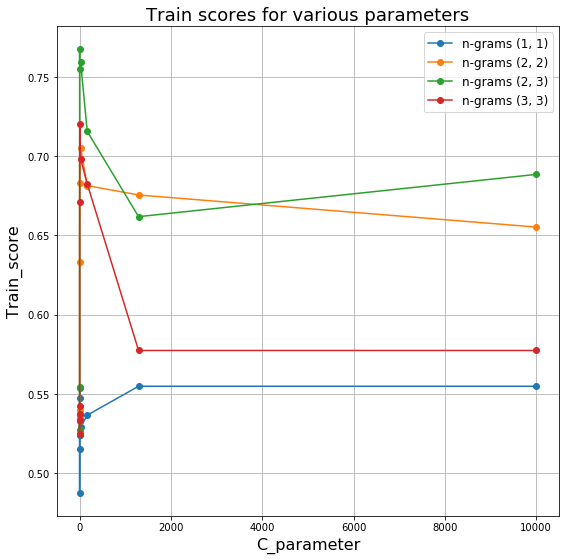

In [28]:
fig = plt.figure(figsize=(9,9))
for i in range(0, len(N_GRAMS_OPTIONS)):
    plt.plot(C_OPTIONS, res_train[i], '-o', label='n-grams {}'.format(N_GRAMS_OPTIONS[i]))
plt.legend(fontsize=12)
plt.grid('on')
plt.title('Train scores for various parameters', fontsize=18)
plt.ylabel('Train_score', fontsize=16)
plt.xlabel('C_parameter', fontsize=16)

In [37]:
res_test = []
for gr in N_GRAMS_OPTIONS:
    res_test.append([grid.cv_results_['mean_test_score'][i]
             for i in range(0, len(grid.cv_results_['mean_test_score']))
             if grid.cv_results_['params'][i]['countvec__ngram_range'] == gr])

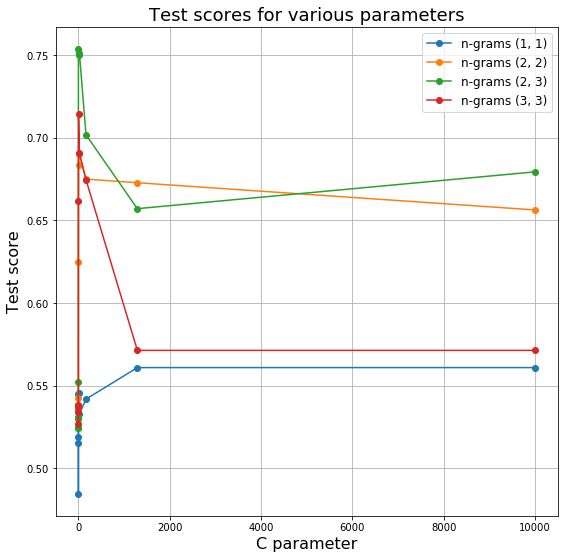

In [38]:
fig = plt.figure(figsize=(9,9))
for i in range(0, len(N_GRAMS_OPTIONS)):
    plt.plot(C_OPTIONS, res_test[i], '-o', label='n-grams {}'.format(N_GRAMS_OPTIONS[i]))

plt.legend(fontsize=12)
plt.grid('on')
plt.title('Test scores for various parameters', fontsize=18)
plt.ylabel('Test score',fontsize=16)
plt.xlabel('C parameter', fontsize=16)

Лучшим параметром н-грамм оказался (2,3), что в принципе не удивительно, поскольку этот вариант разбиения сочетает в себе как и биграммное разбиение, так и трехграммное и это позволяет точнее спрогнозировать класс текста.

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [141]:
RND_SEED = 42
data_ = data.sample(n=len(data), random_state=RND_SEED)
data_ = data_.reset_index(drop=True)
data_.head(5)

,word,label
0,funzionavano,0.0
1,today,1.0
2,was,1.0
3,gusterebbe,0.0
4,gradually,1.0


In [142]:
data_redused = data_[:2500]
X_train, X_test, y_train, y_test = train_test_split(np.asarray(data_redused.index).reshape(-1,1),
                                                    np.asarray(data_redused['label']).reshape(-1,1),
                                                    test_size=0.2, random_state=RND_SEED)

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [143]:
import editdistance as ed
#G_ij = K(U_i, V_j)
# I will be using RBF kernel to inverse distance computed by editdistance.eval
# RBF kernel: exp(-gamma * distance**2)
def string_kernel(U, V):
    G = np.asarray([[ed.eval(data_.iloc[i[0]].word, data_.iloc[j[0]].word) for j in V] for i in U])
    return G
def invert_distance(M, gamma):
    return np.exp(-gamma*(M**2))

In [144]:
G_ = string_kernel(X_train, X_train)
G_ = invert_distance(G_, 1.1)

In [145]:
G_

array([[  1.00000000e+00,   3.90415836e-24,   2.66482365e-31, ...,
          3.90415836e-24,   2.66482365e-31,   2.66482365e-31],
       [  3.90415836e-24,   1.00000000e+00,   6.33779980e-18, ...,
          6.33779980e-18,   1.13999185e-12,   2.01540189e-39],
       [  2.66482365e-31,   6.33779980e-18,   1.00000000e+00, ...,
          2.27204599e-08,   6.33779980e-18,   3.90415836e-24],
       ..., 
       [  3.90415836e-24,   6.33779980e-18,   2.27204599e-08, ...,
          1.00000000e+00,   3.90415836e-24,   2.66482365e-31],
       [  2.66482365e-31,   1.13999185e-12,   6.33779980e-18, ...,
          3.90415836e-24,   1.00000000e+00,   2.66482365e-31],
       [  2.66482365e-31,   2.01540189e-39,   3.90415836e-24, ...,
          2.66482365e-31,   2.66482365e-31,   1.00000000e+00]])

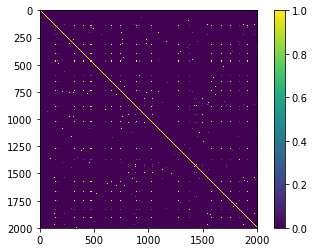

In [146]:
plt.imshow(G_)
plt.colorbar()

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [84]:
G_train = string_kernel(X_train, X_train)

In [85]:
G_test = string_kernel(X_test, X_train)

In [86]:
print(G_train.shape, G_test.shape)

(2000, 2000) (500, 2000)


In [87]:
%timeit G_train_inv = invert_distance(G_train, 1.1)

10 loops, best of 3: 50.3 ms per loop


Для нашей модели посчитаем как зависит скор от двух параметров - С и гамма. 
Параметр гамма определяет насколько сильно влияние элемента тренировочной выборки, выбранного моделью в качестве опорного вектора. Т.е. чем меньше гамма, тем больше радиус области относимой к одному классу опорным вектором.
Поэтому переберем гаммы в небольшом диапазоне.

In [124]:
C_OPTIONS = np.logspace(-5,5,15)
gamma = np.linspace(0.1, 2, num=15)
score = np.zeros((len(C_OPTIONS)*len(gamma), 4))
ind = 0
for g in gamma:
    G_train_inv = invert_distance(G_train, g)
    G_test_inv = invert_distance(G_test, g)
    for i in C_OPTIONS:
        model = svm.SVC(kernel='precomputed', C=i, random_state=RND_SEED)
        model.fit(G_train_inv, y_train)
        score[ind][0] = g
        score[ind][1] = i
        score[ind][3] = accuracy_score(model.predict(G_train_inv), y_train)
        score[ind][2] = accuracy_score(model.predict(G_test_inv), y_test)
        ind += 1

In [125]:
score_table = pd.DataFrame(score, columns=['gamma', 'C parameter', 'Test score', 'Train score'])
score_table

,gamma,C parameter,Test score,Train score
0,0.100000,0.000010,0.516,0.5545
1,0.100000,0.000052,0.516,0.5545
2,0.100000,0.000268,0.516,0.5545
3,0.100000,0.001389,0.516,0.5545
4,0.100000,0.007197,0.516,0.5545
5,0.100000,0.037276,0.690,0.7345
6,0.100000,0.193070,0.768,0.8070
7,0.100000,1.000000,0.764,0.8435
8,0.100000,5.179475,0.750,0.8290
9,0.100000,26.826958,0.764,0.8350


In [139]:
best_score = score_table.iloc[score_table['Test score'].argmax()]
best_score

gamma            0.642857
C parameter    719.685673
Test score       0.826000
Train score      0.988500
Name: 71, dtype: float64

In [142]:
best_score[1]

719.68567300115285

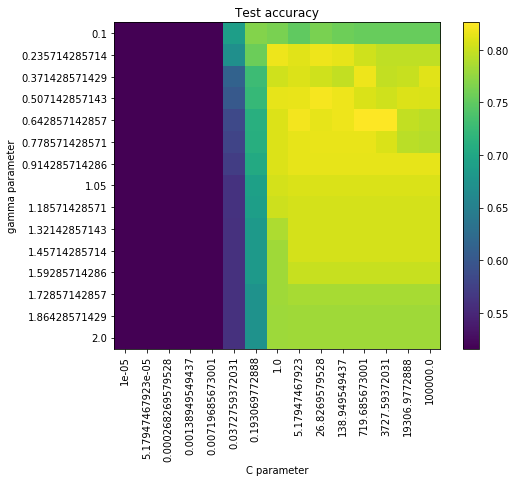

In [153]:
plt.figure(figsize=(8, 6))
plt.imshow(score[:, 2].reshape(len(C_OPTIONS), len(gamma)), interpolation='nearest')
plt.ylabel('gamma parameter')
plt.xlabel('C parameter')
plt.colorbar()
plt.yticks(np.arange(len(gamma)), gamma)
plt.xticks(np.arange(len(C_OPTIONS)), C_OPTIONS, rotation=90)
plt.title('Test accuracy')